In [1]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset

In [4]:
df = pd.read_csv("data/data.csv")

labels = df.label.values
images = df.drop('label', axis=1).values.reshape(-1, 28, 28)

# Print shape of images array, and the first 10 labels
images.shape, labels[:10]

((60000, 28, 28), array([2, 9, 6, 0, 3, 4, 4, 5, 4, 8], dtype=int64))

## Descriptive Statistics

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [8]:
# Statistics of each pixel column
df.iloc[:, 1:].describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


## Visualizing the first ten images of the dataset

In [11]:
# First get the label mappings so that we don't have to guess which image belongs to which class
label_mappings = {
    0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"
}

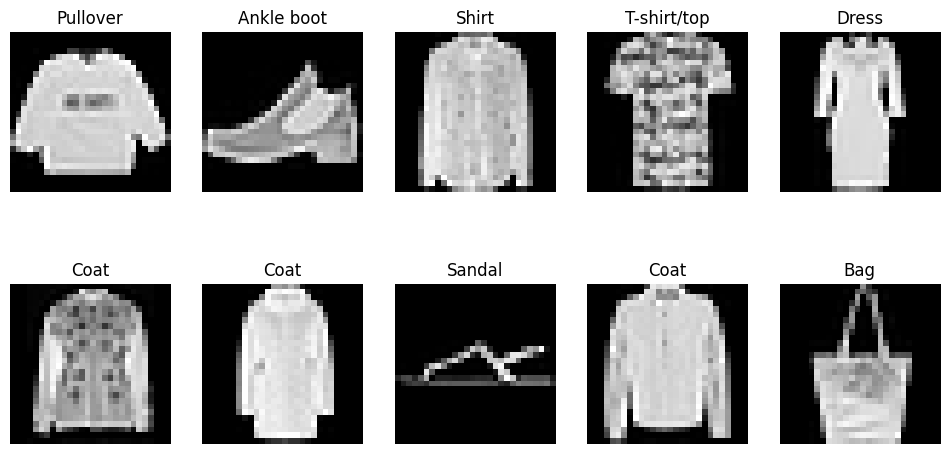

In [12]:
fix, ax = plt.subplots(2, 5, figsize=(12, 6))
ax = ax.flatten()

for i in range(10):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(label_mappings[labels[i]])
    ax[i].axis("off")
    
plt.show()

## Visualizing an image of each class

### Finding the first image of each class

In [21]:
# Getting the index of the first index where a Label of 0 occurs
idx = np.where(labels==0)[0][0]

"Index = " + str(idx), labels[idx], labels[:idx+1]   # Verifying the same

('Index = 3', 0, array([2, 9, 6, 0], dtype=int64))

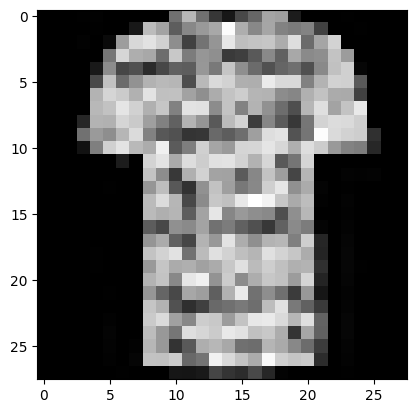

In [22]:
# Plotting the image at `idx` to sure `labels` and `images` are aligned
img = images[idx]
plt.imshow(img, cmap='gray')

In [25]:
# Doing the same for all classes

first_idx_imgs = {}

for i in range(10):
    idx = np.where(labels == i)[0][0]
    first_idx_imgs[i] = images[idx]

### Plotting the first image of each class

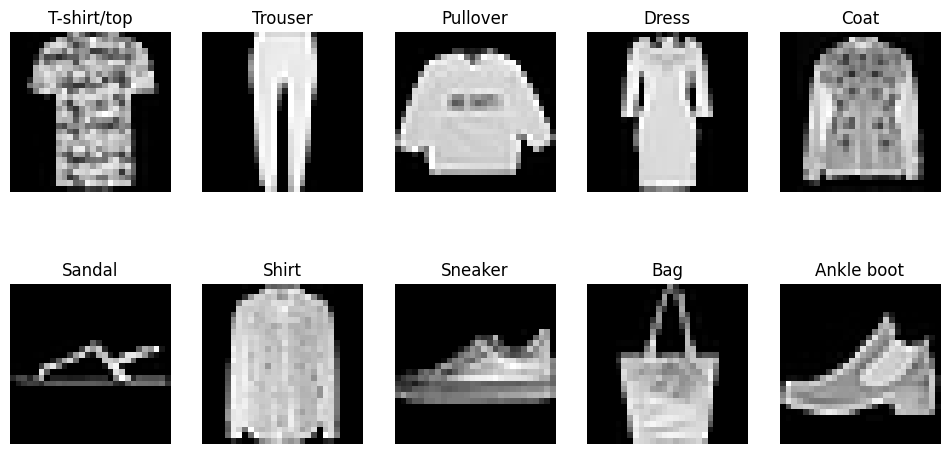

In [26]:
fix, ax = plt.subplots(2, 5, figsize=(12, 6))
ax = ax.flatten()

for i in range(10):
    ax[i].imshow(first_idx_imgs[i], cmap='gray')
    ax[i].set_title(label_mappings[i])
    ax[i].axis("off")
    
plt.show()

## Doing EDA on the dataset

Since the dataset mostly only contains pixel values, there's not a lot of EDA we can do. So here's what we'll try to achieve:
* Getting summary statistics of all the pixel values (max value, min value, mean, median, standard deviation)
* See the distribution of the pixel values using a Histogram
* Understand the distribution of the labels (how many examples of each label do we have)
* Get the class-wise pixel statistics

In [31]:
# Get a numpy array depicting the value of each pixel across every example
pixel_vals = df.drop("label", axis=1).values.flatten()
pixel_vals.shape

(47040000,)

In [34]:
# Getting the statistics of all pixel values
max_val = pixel_vals.max()
min_val = pixel_vals.min()
mean = pixel_vals.mean()
median = np.median(pixel_vals)
std = np.std(pixel_vals)

print(f"Max = {max_val:.2f} | Min = {min_val:.2f} | Mean = {mean:.4f} | Median = {median:.4f} | Standard Deviation = {std:.4f}")

Max = 255.00 | Min = 0.00 | Mean = 72.9568 | Median = 0.0000 | Standard Deviation = 89.9669


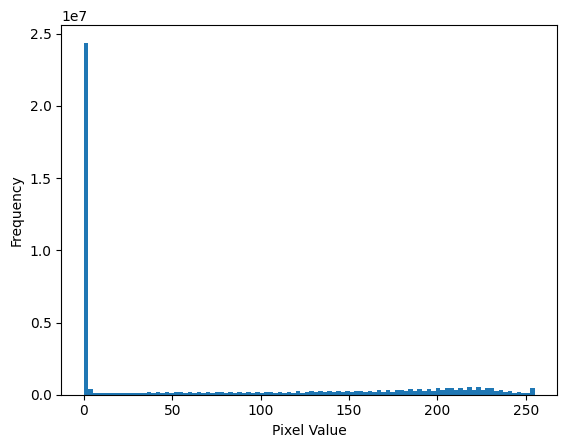

In [35]:
# Understanding the pixel distribution through a histogram
plt.hist(pixel_vals, bins=100, range=(min_val, max_val))
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

This makes sense as the majority of the pixels are background, ie, black which corresponds to the pixel value 0

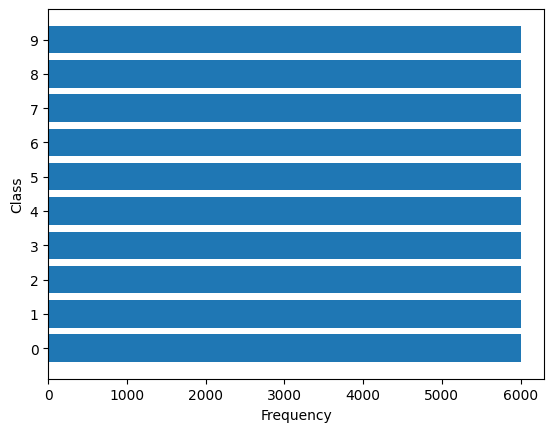

In [46]:
# Understanding the label distribution
label_counts = df.label.value_counts()

plt.barh(label_counts.index, label_counts.values)
plt.ylabel("Class")
plt.xlabel("Frequency")
plt.yticks(range(10))
plt.xticks(range(0, 6001, 1000))
plt.show()

This means that the distribution of all the classes is the same

In [57]:
# Get the class-wise pixels statistics
labels = df.label.to_numpy()

for i in range(10):
    idxs = np.where(labels == i)
    class_pixels = images[idxs].flatten()
    
    print(f"Class: {label_mappings[i]:12} - ", end=" ")
    print(f"Max: {class_pixels.max():.2f}", end=" ")    
    print(f"Min: {class_pixels.min():.2f}", end=" ")    
    print(f"Mean: {class_pixels.mean():.4f}", end=" ")    
    print(f"Median: {np.median(class_pixels):.4f}", end=" ")    
    print(f"Standard Deviation: {np.std(class_pixels):.4f}")

Class: T-shirt/top  -  Max: 255.00 Min: 0.00 Mean: 82.8793 Median: 48.0000 Standard Deviation: 89.2038
Class: Trouser      -  Max: 255.00 Min: 0.00 Mean: 56.7484 Median: 0.0000 Standard Deviation: 87.4573
Class: Pullover     -  Max: 255.00 Min: 0.00 Mean: 95.7193 Median: 83.0000 Standard Deviation: 91.1633
Class: Dress        -  Max: 255.00 Min: 0.00 Mean: 66.2015 Median: 0.0000 Standard Deviation: 90.3329
Class: Coat         -  Max: 255.00 Min: 0.00 Mean: 98.1557 Median: 87.0000 Standard Deviation: 95.8719
Class: Sandal       -  Max: 255.00 Min: 0.00 Mean: 34.8705 Median: 0.0000 Standard Deviation: 67.1066
Class: Shirt        -  Max: 255.00 Min: 0.00 Mean: 85.1151 Median: 63.0000 Standard Deviation: 86.6914
Class: Sneaker      -  Max: 255.00 Min: 0.00 Mean: 42.8357 Median: 0.0000 Standard Deviation: 75.2765
Class: Bag          -  Max: 255.00 Min: 0.00 Mean: 90.0358 Median: 61.0000 Standard Deviation: 93.1201
Class: Ankle boot   -  Max: 255.00 Min: 0.00 Mean: 77.0072 Median: 0.0000 Sta

This means that for trousers, dresses, sandals, sneakers, and ankle boots, approx half values are 0, or half the pixels are depicting a black value 

In [59]:
# Let's more clearly see the correlation between median and mean for classes where median is 0
median_0 = []       # To store mean for classes with 0 median
median_not_0 = []   # To store mean for classes with a non-zero median

for i in range(10):
    idxs = np.where(labels == i)
    class_pixels = images[idxs].flatten()
    
    if np.median(class_pixels) == 0: median_0.append(np.mean(class_pixels))
    else: median_not_0.append(np.mean(class_pixels))

print(f"When median = 0, mean = {median_0}")
print(f"When median != 0, mean = {median_not_0}")

When median = 0, mean = [56.74837202380952, 66.20148724489796, 34.87051700680272, 42.83567219387755, 77.00715029761905]
When median != 0, mean = [82.87926403061225, 95.71932759353741, 98.15565603741497, 85.11509778911565, 90.0357619047619]


This proves a strong correlation between median and mean, as it should be.